# NY City EDA Project

Importaciones

In [7]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split


1. Data collection

In [8]:
file_path = "C:\\Users\\Albert\\Desktop\\Data Science & Machine Learning Bootcamp\\2.Bootcamp\\13. Exploratory Data Analysis\\Data-Preprocessing-Project-Tutorial-AirBnB-EDA-\\data\\raw\\AB_NYC_2019.csv"
total_data = pd.read_csv(file_path)
total_data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


2. Exploration and data cleaning

In [9]:
total_data.shape

(48895, 16)

In [10]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

* Existen 48895 registros (líneas) en 16 columnas
* Columnas 1, 12 y 13 tienen valores nulos. 12 y 13 con gran número. 
* Los valores cuentan con 10 características númericas y 6 características categóricas

Contamos duplicados

In [11]:
#Eliminamos duplicados si los hubiese
print(f"Duplicados en ID son: {total_data['id'].duplicated().sum()}")
print(f"Duplicados en Name son: {total_data['name'].duplicated().sum()}")
print(f"Duplicados en Host ID son: {total_data['host_id'].duplicated().sum()}")


Duplicados en ID son: 0
Duplicados en Name son: 989
Duplicados en Host ID son: 11438


Eliminar información irrelevante

In [12]:
total_data = total_data.drop(["id", "name", "host_name", "latitude","longitude" ,"last_review", "reviews_per_month"], axis = 1)
total_data.head(3)

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365


3. Analysis of univariate variables

Análisis de variables categoricas

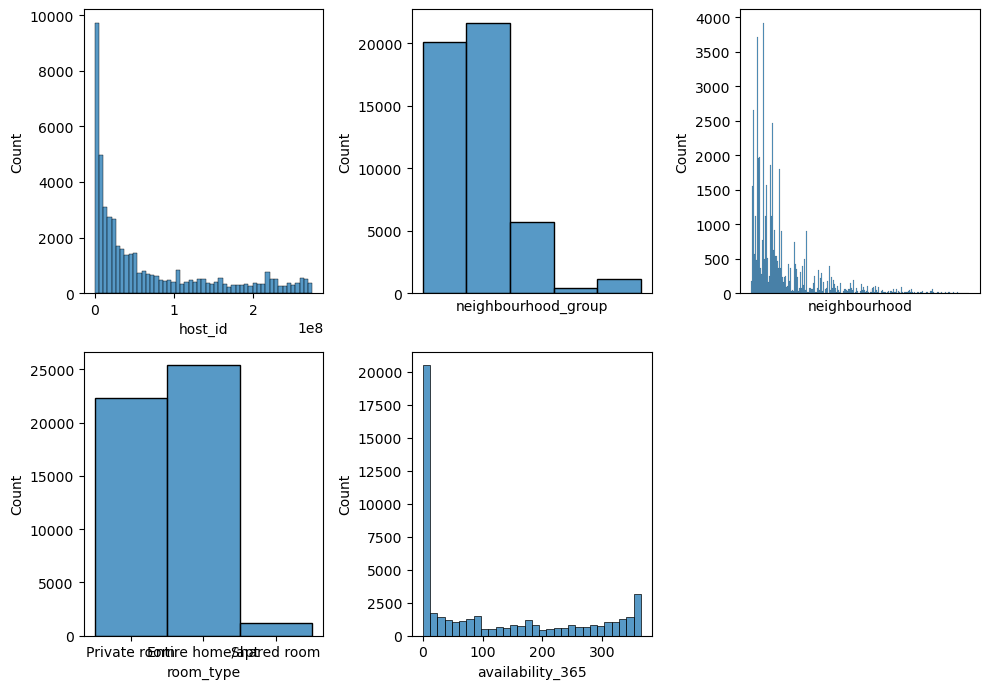

In [13]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0, 1], data = total_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0, 2], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1, 0], data = total_data, x = "room_type")
sns.histplot(ax = axis[1, 1], data = total_data, x = "availability_365")
fig.delaxes(axis[1, 2])

plt.tight_layout()
plt.show()

Observamos lo siguiente:

* Encontramos muchos NaN en host_id
* Tenemos solo 5 vecindarios con diferente volumen de oferta
* Hay muchos más apartamentos que habitaciones ofertadas, y casi nulas ofertas de habitaciones compartidas
* La mayoria de habitaciones están disponibles los 365 días al año. 

Análisis sobre variables númericas

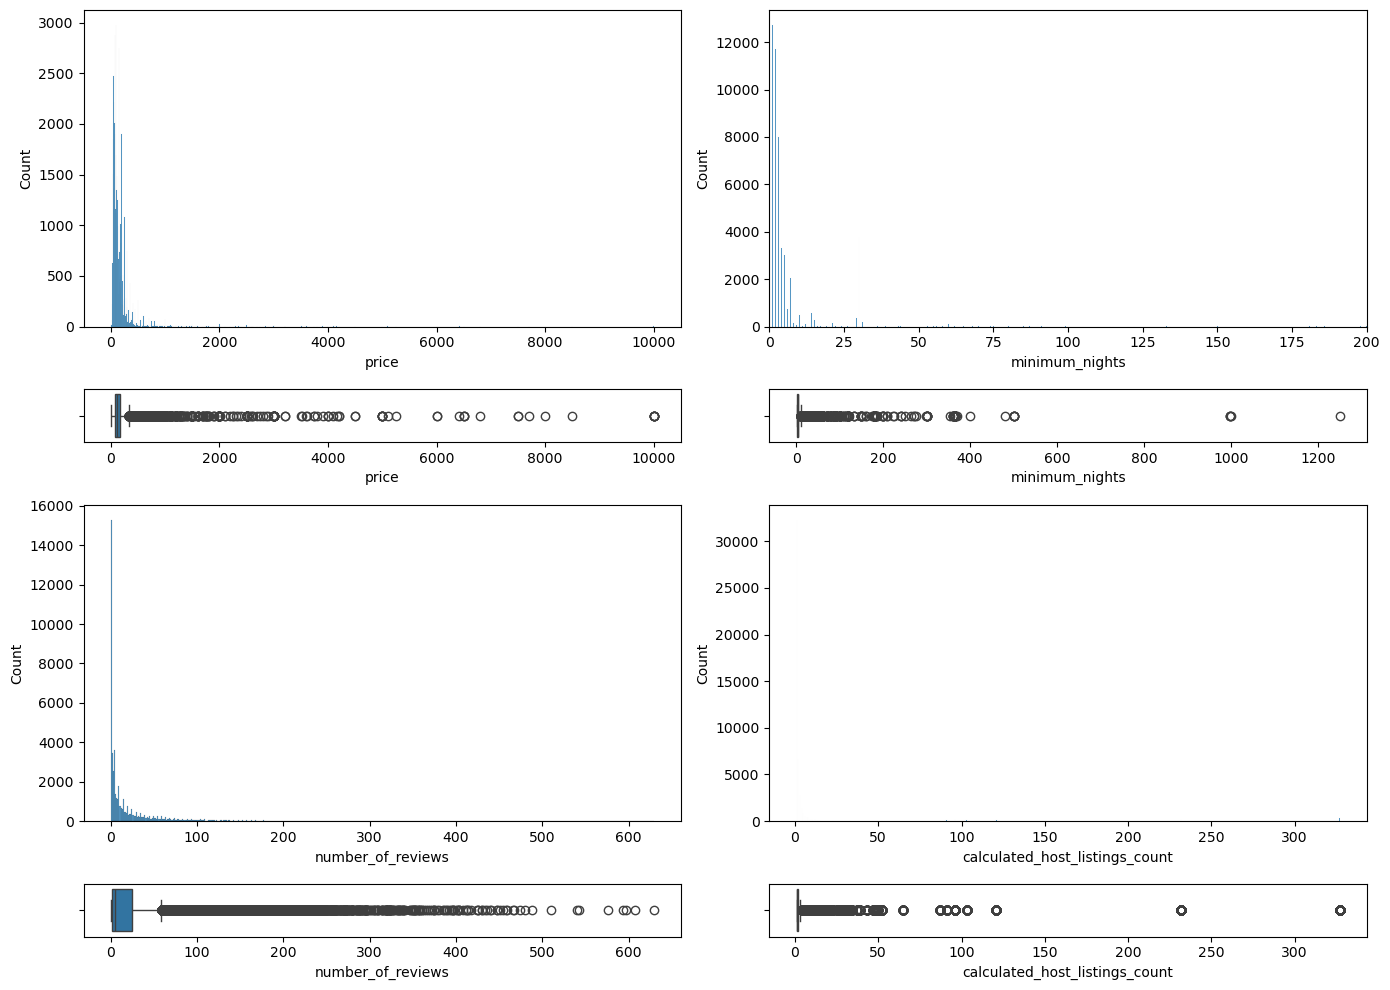

In [14]:
fig, axis = plt.subplots(4, 2, figsize=(14, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax=axis[0, 0], data=total_data, x='price')
sns.boxplot(ax=axis[1, 0], data=total_data, x='price')

sns.histplot(ax=axis[0, 1], data=total_data, x='minimum_nights').set_xlim(0, 200)
sns.boxplot(ax=axis[1, 1], data=total_data, x='minimum_nights')

sns.histplot(ax=axis[2, 0], data=total_data, x='number_of_reviews')
sns.boxplot(ax=axis[3, 0], data=total_data, x='number_of_reviews')

sns.histplot(ax=axis[2, 1], data=total_data, x='calculated_host_listings_count')
sns.boxplot(ax=axis[3, 1], data=total_data, x='calculated_host_listings_count')

plt.tight_layout()
plt.show()


4. Analysis of multivariate variables

Análisis numérico-numérico

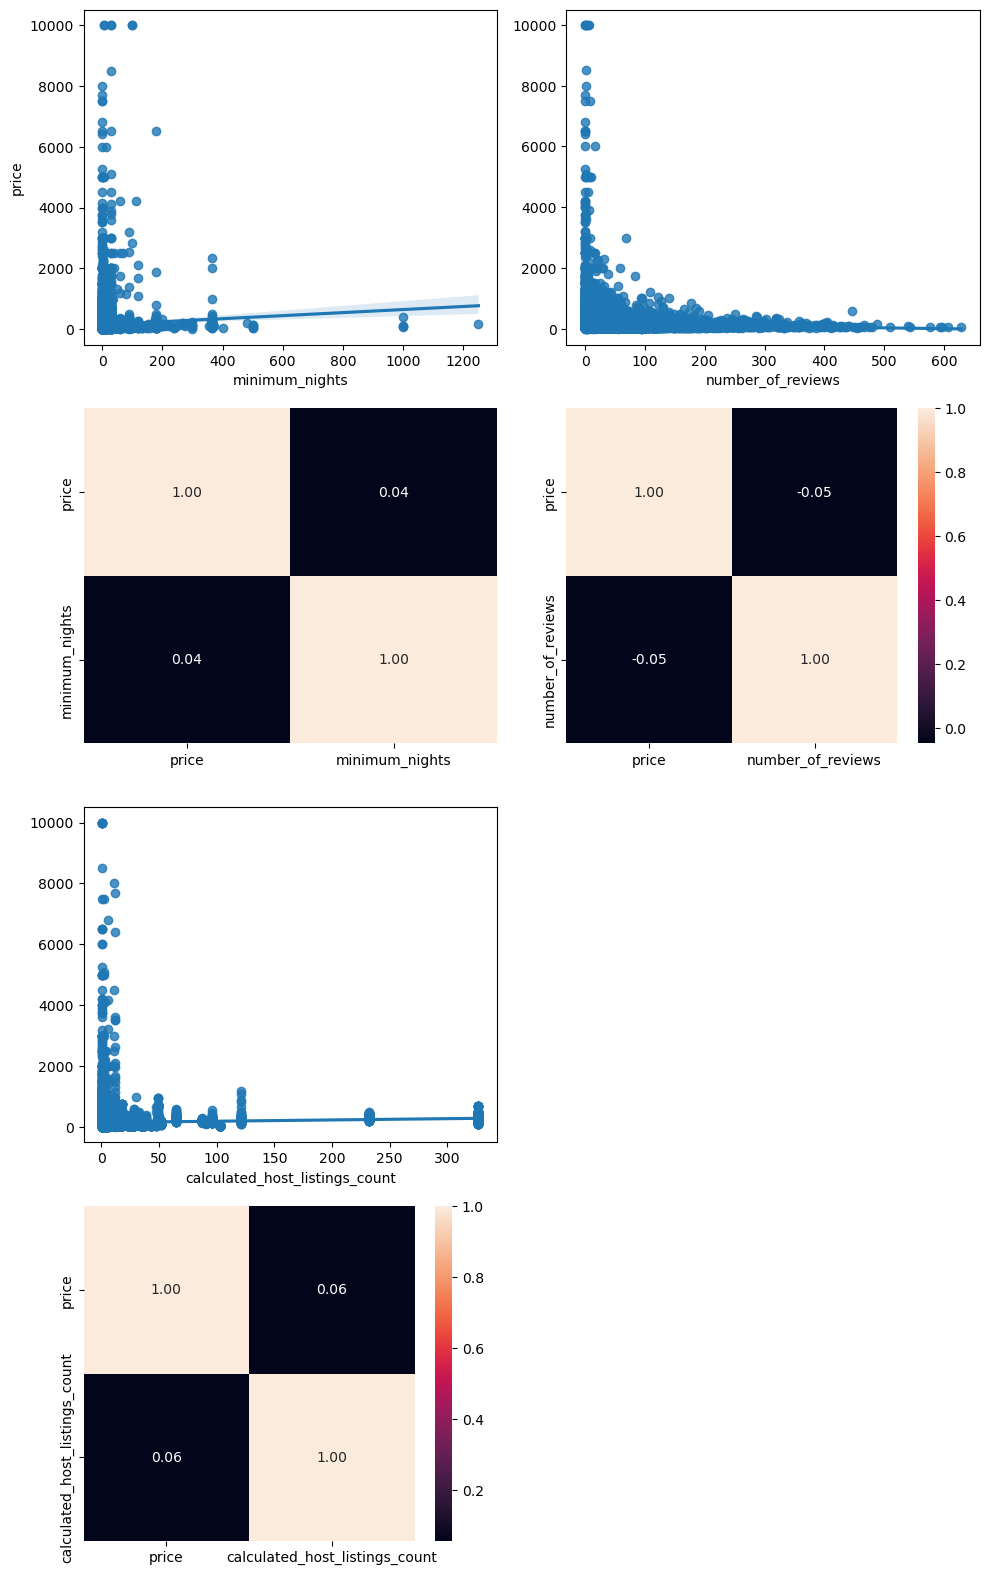

In [15]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0,0], data = total_data, x ='minimum_nights' , y = 'price')
sns.heatmap(total_data[['price', 'minimum_nights']].corr(), annot = True, fmt = ".2f", ax = axis[1,0],cbar = False)

sns.regplot(ax = axis[0,1], data = total_data, x ='number_of_reviews' , y = 'price').set(ylabel = None)
sns.heatmap(total_data[['price', 'number_of_reviews']].corr(), annot = True, fmt = ".2f", ax = axis[1,1])

sns.regplot(ax = axis[2,0], data = total_data, x ='calculated_host_listings_count' , y = 'price').set(ylabel = None)
sns.heatmap(total_data[['price', 'calculated_host_listings_count']].corr(), annot = True, fmt = ".2f", ax = axis[3,0]).set(ylabel = None)

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()
plt.show()



Análisis categórico - categórico

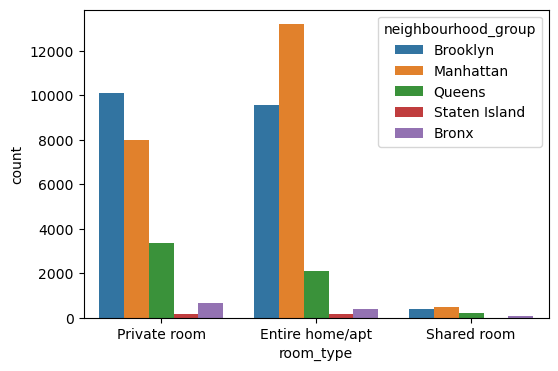

In [16]:
fig, axis = plt.subplots(figsize=(6,4))

sns.countplot(data = total_data, x = "room_type", hue = 'neighbourhood_group')
plt.show()

* El barrio con más ofertas es Manhattan, seguido por Brooklyn, y Queens.
* Manhattan es quien tiene la mayor oferta de apartamentos y casas completas.
* Brooklyn ocupa el segundop lugar pero el primero en habitaciones privadas, por encima de Manhattan.
* Staten Island es casi inexistente en cuando a cualquier tipo de oferta.

Análisis combinatorio categorico-numérico

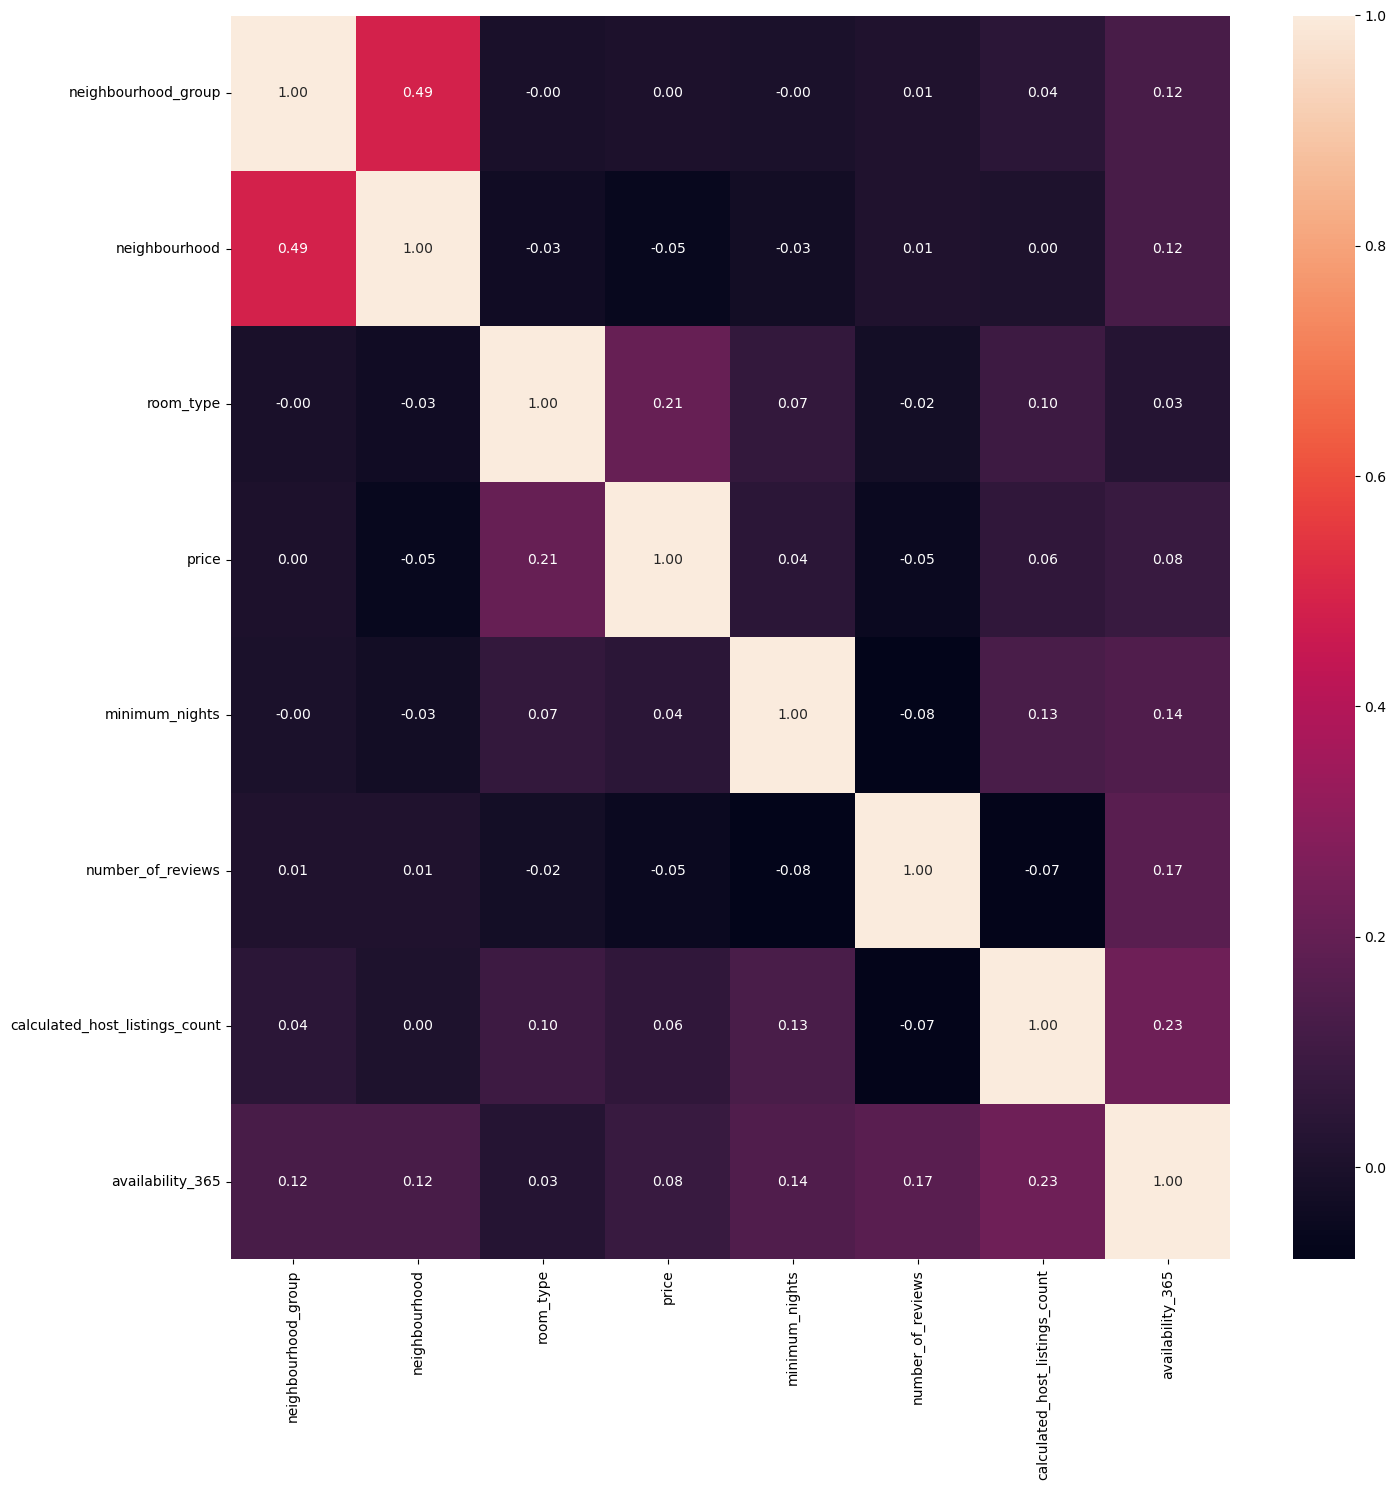

In [17]:
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize = (15, 15))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()


* Poca correlación entre los diferentes items

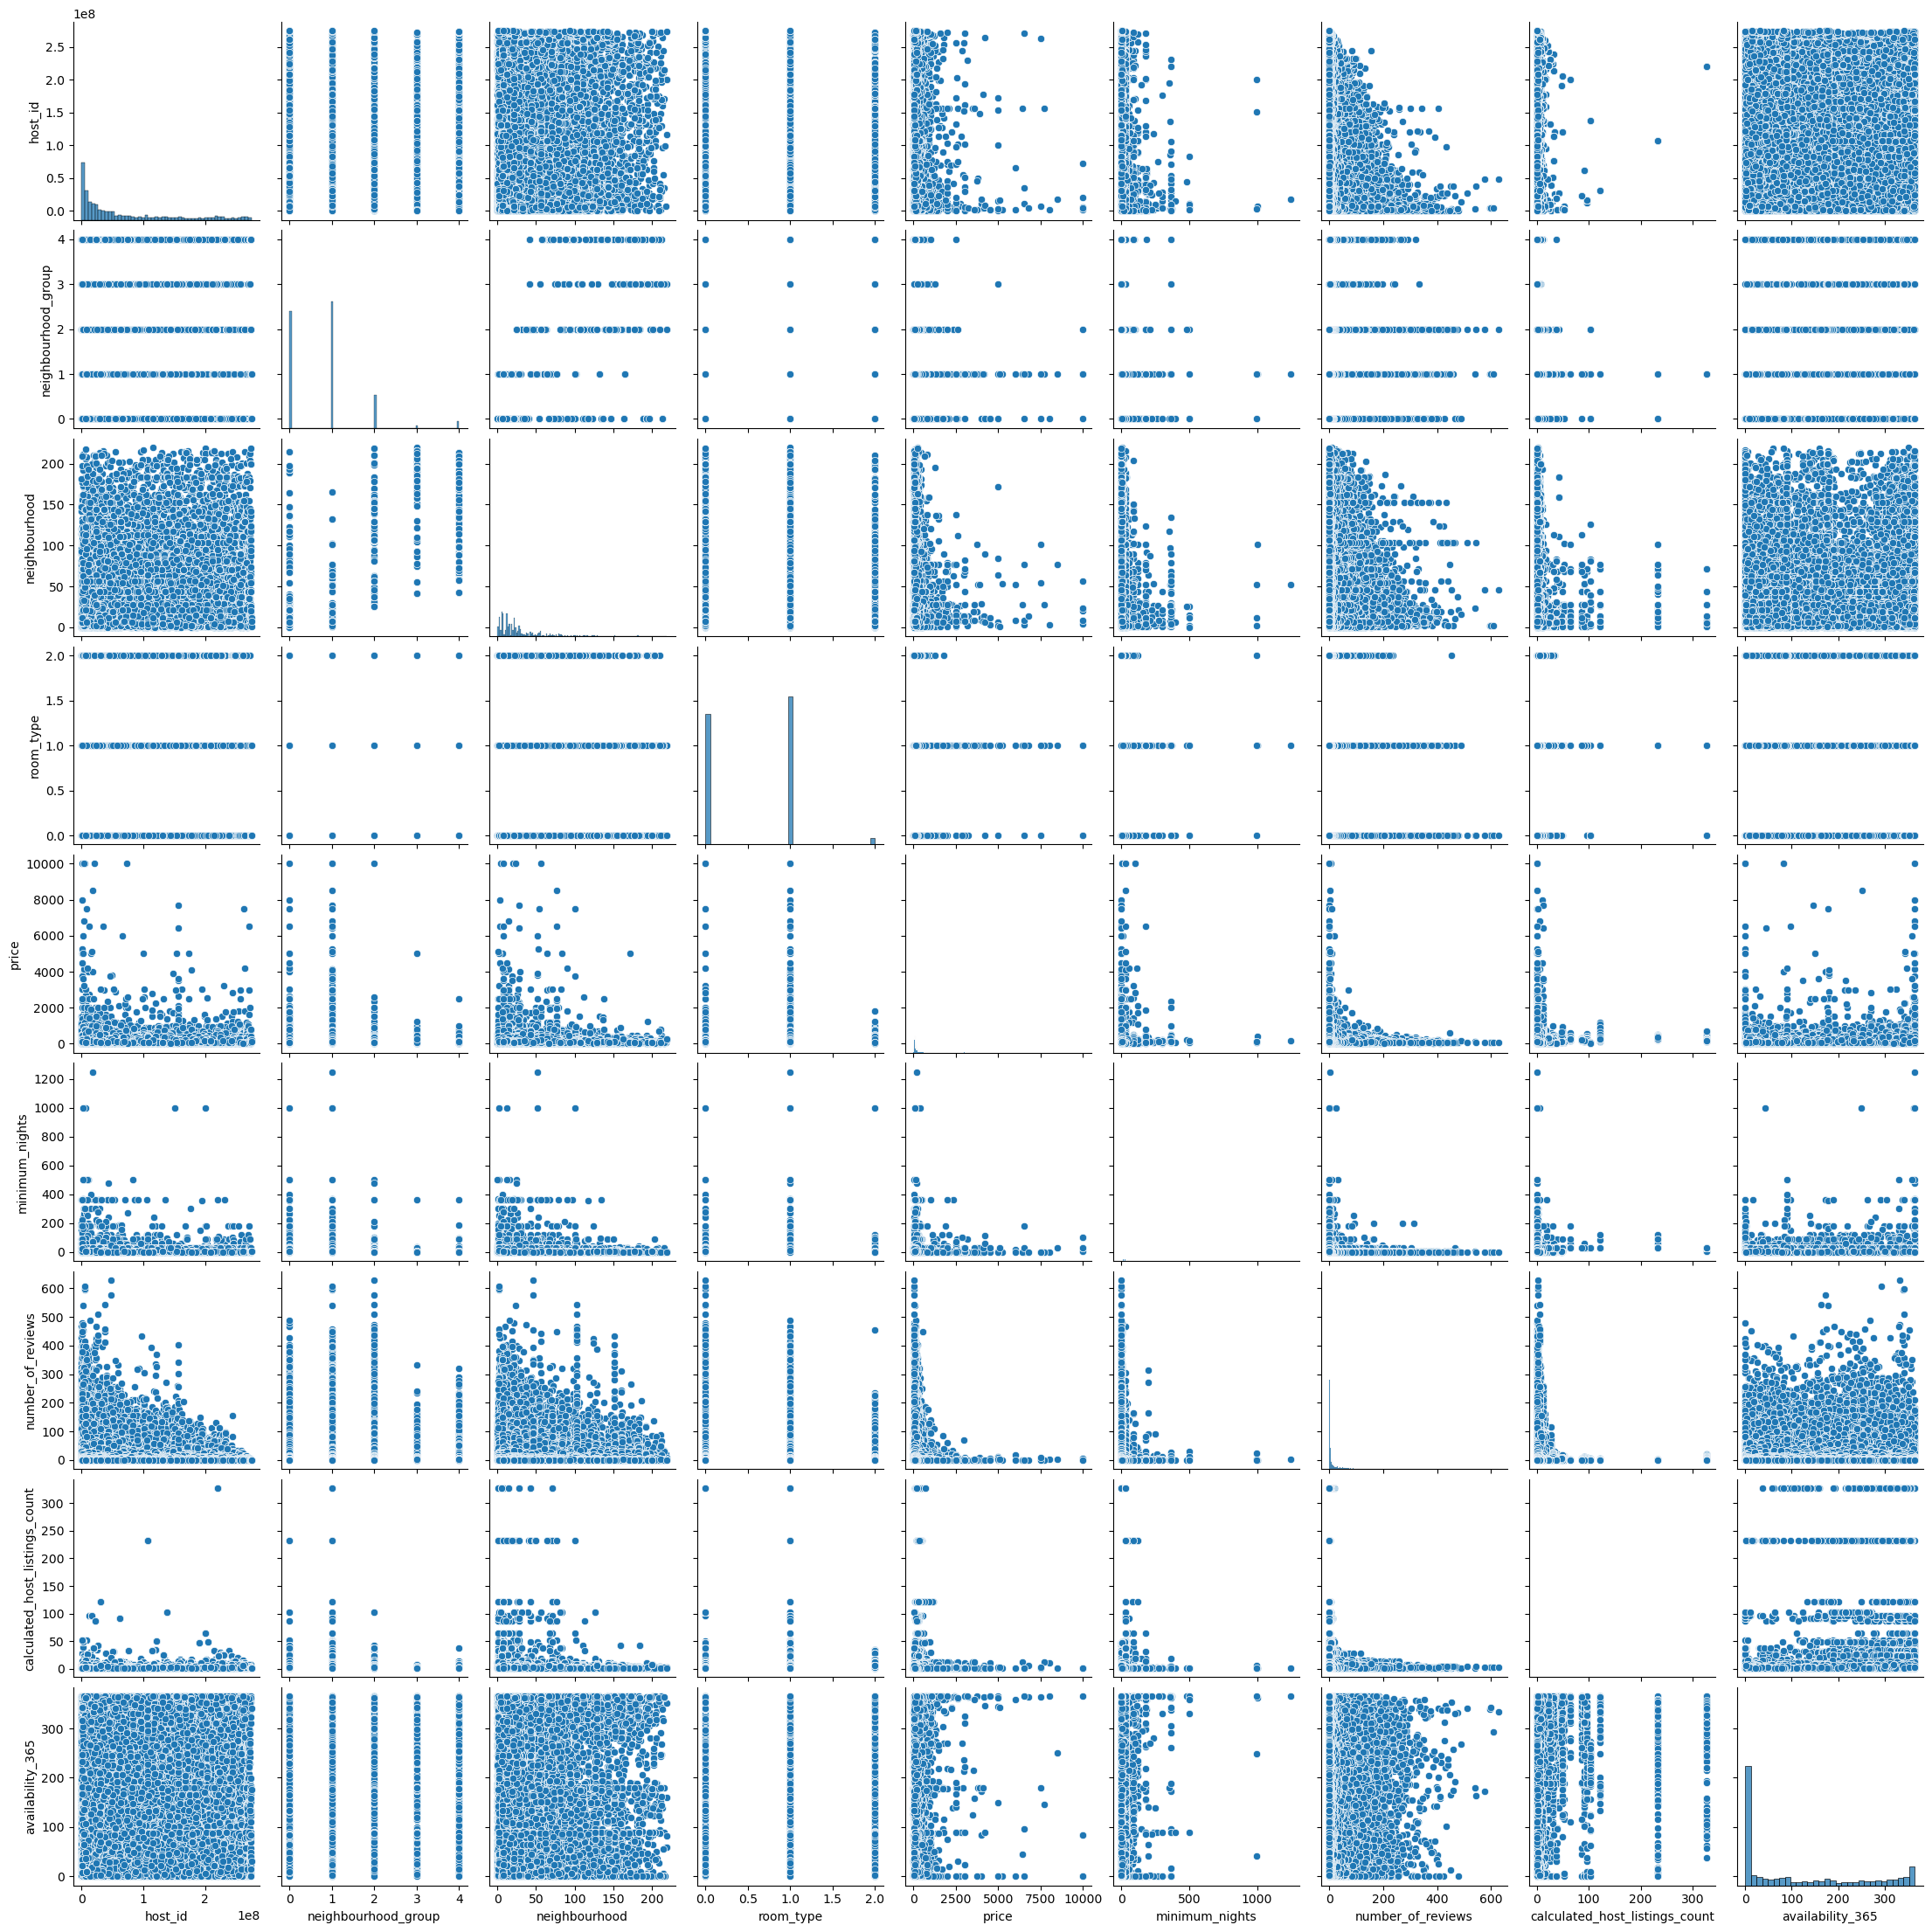

In [18]:
sns.pairplot(data = total_data)

5. Feature engineering

Análisis de outliers

In [19]:
total_data.describe()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


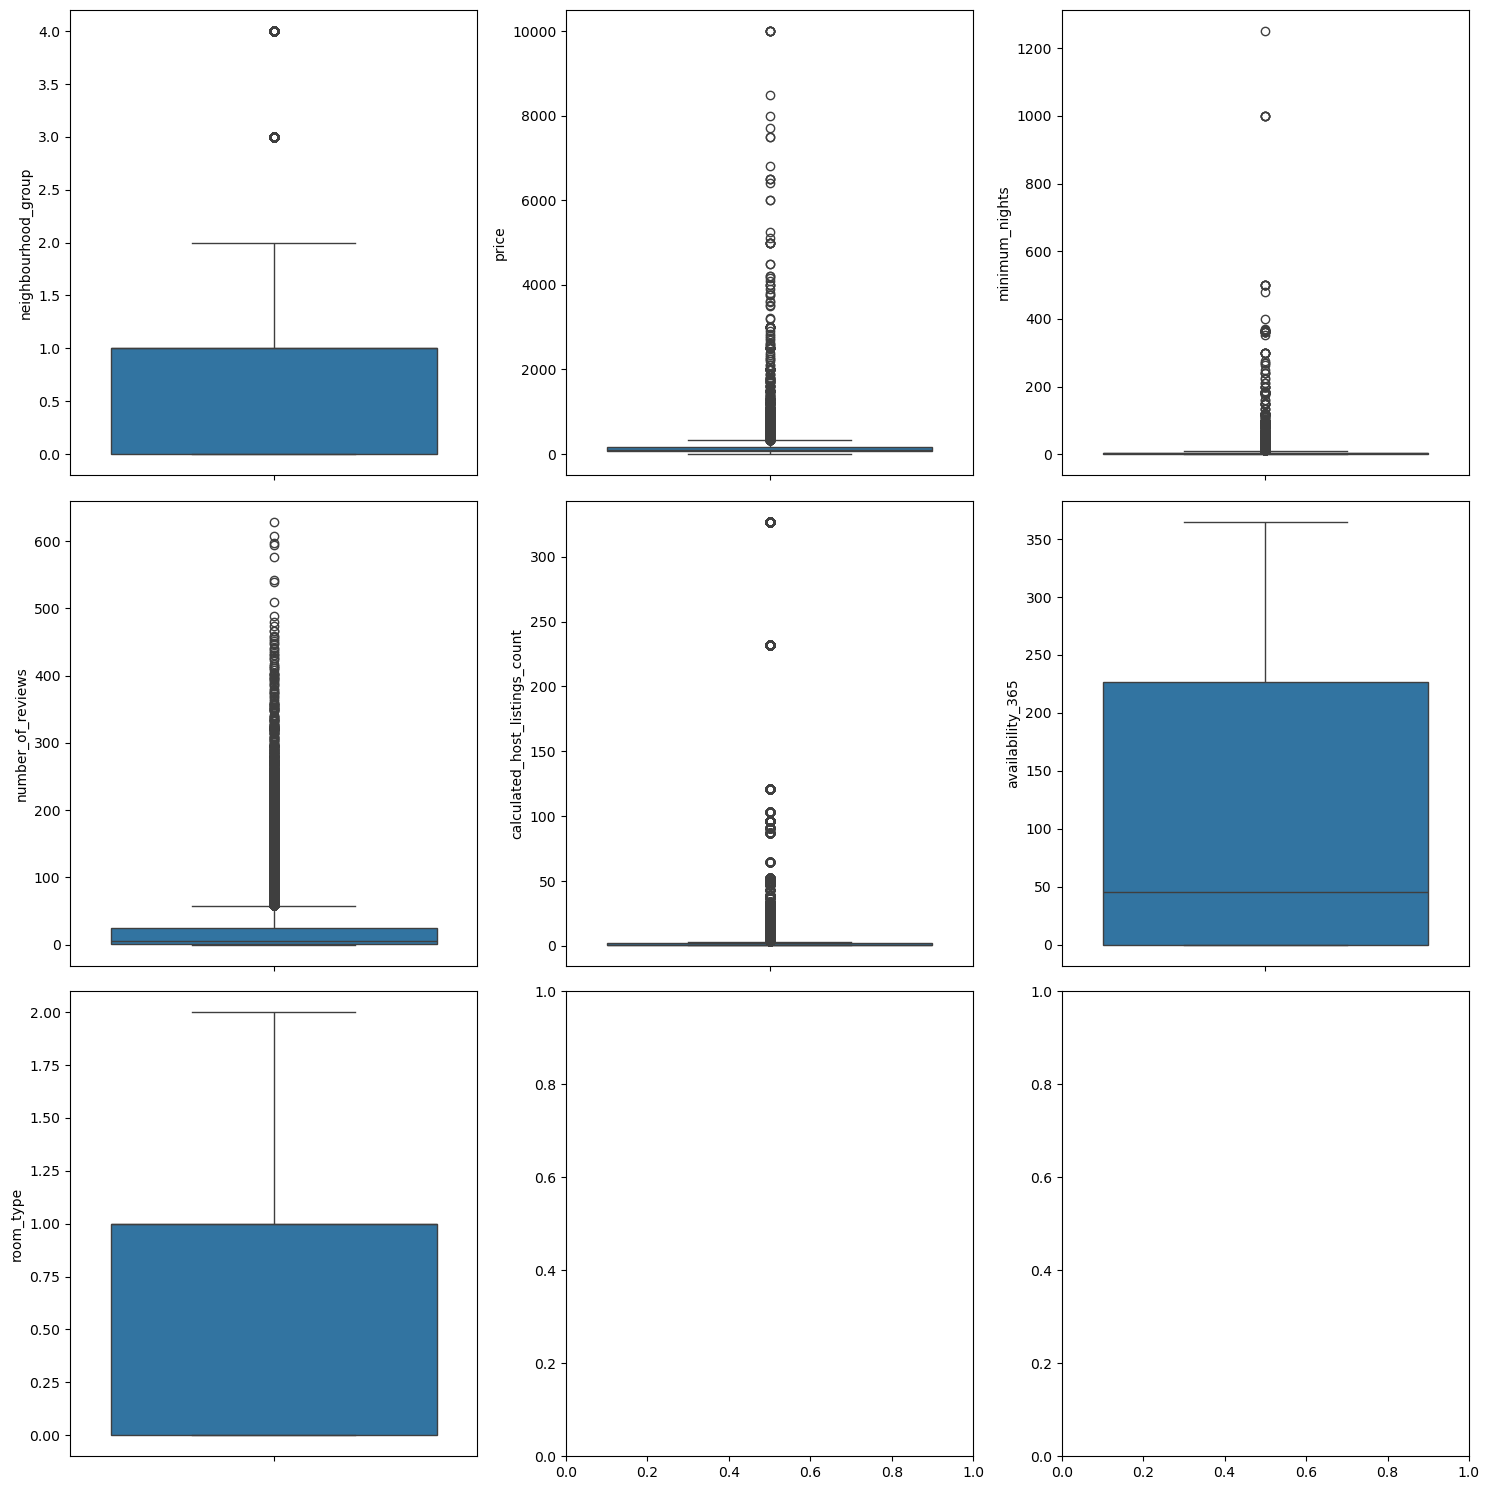

In [20]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "room_type")
# fig.delaxes(axis[3, 2])
# fig.delaxes(axis[3, 3])


plt.tight_layout()
plt.show()

Valores atípcos para price

In [21]:
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [22]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


Limpieza de outliers

In [23]:
total_data = total_data[total_data["price"] > 0]


In [24]:
count_0 = total_data[total_data["price"] == 0].shape[0]
count_1 = total_data[total_data["price"] == 1].shape[0]

print("Cantidad de 0: ", count_0)
print("Cantidad de 1: ", count_1)

Cantidad de 0:  0
Cantidad de 1:  0


Detección de valores atípicos para el número mínimo de noches

In [25]:
nights_stats = total_data["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [26]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(nights_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 11.0 y -5.0, con un rango intercuartílico de 4.0


Limpieza de outliers


In [27]:
total_data = total_data[total_data["minimum_nights"] <= 15]


In [28]:
count_0 = total_data[total_data["minimum_nights"] == 0].shape[0]
count_1 = total_data[total_data["minimum_nights"] == 1].shape[0]
count_2 = total_data[total_data["minimum_nights"] == 2].shape[0]
count_3 = total_data[total_data["minimum_nights"] == 3].shape[0]
count_4 = total_data[total_data["minimum_nights"] == 4].shape[0]


print("Cantidad de 0: ", count_0)
print("Cantidad de 1: ", count_1)
print("Cantidad de 2: ", count_2)
print("Cantidad de 3: ", count_3)
print("Cantidad de 4: ", count_4)

Cantidad de 0:  0
Cantidad de 1:  12717
Cantidad de 2:  11693
Cantidad de 3:  7998
Cantidad de 4:  3302


Detección de valores atípicos para el número de reseñas


In [29]:
review_stats = total_data["number_of_reviews"].describe()
review_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [30]:
review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(review_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 66.0 y -38.0, con un rango intercuartílico de 26.0


Detección de valores atípicos para el calculated_host_listings_count








In [31]:
hostlist_stats = total_data["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [32]:
hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(hostlist_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3.5 y -0.5, con un rango intercuartílico de 1.0


In [33]:
count_0 = sum(1 for x in total_data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data[total_data["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data[total_data["calculated_host_listings_count"] == 2].shape[0]

print("Cantidad de 0: ", count_0)
print("Cantidad de 1: ", count_1)
print("Cantidad de 2: ", count_2)

Cantidad de 0:  40308
Cantidad de 1:  30253
Cantidad de 2:  6179


Limpieza de outliers

In [34]:
total_data = total_data[total_data["calculated_host_listings_count"] > 4]


Análisis de valores faltantes








In [35]:
total_data.isnull().sum().sort_values(ascending = False)


host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Escalado de valores

In [36]:
num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
df_scal["price"] = total_data["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.016575,0.000000,0.003106,1.000000,0.0,0.0,149
21,0.239411,0.071429,0.003106,0.950685,0.0,0.0,130
22,0.071823,0.000000,0.003106,0.997260,0.0,0.0,80
23,0.130755,0.071429,0.003106,0.832877,0.0,0.0,110
92,0.029466,0.428571,0.003106,0.506849,0.0,0.0,98


6. Selección de características

In [37]:
X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.000000,0.000000,0.846575,0.0
1,0.071429,1.000000,0.169863,0.5
2,0.071429,0.000000,1.000000,0.0
3,0.428571,0.130435,0.926027,0.0
4,0.071429,1.000000,0.778082,0.5


Guardado de la limpieza y el RAW Data

In [38]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/AB_NYC_2019_clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/AB_NYC_2019_clean_test.csv", index = False)

#Agregada carpeta processed/ a gitignore